In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into python environment

In [33]:
data = pd.read_csv("titanic_dataset .csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
data = data.set_index('PassengerId')
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.shape

(891, 11)

In [36]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [38]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Preprocessing steps

In [39]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
#filling missing values in 'Age'

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [41]:
#filling missing values in 'Cabin'& 'Embarked'

data['Cabin'] = data['Cabin'].fillna(method='bfill')
data['Embarked'] = data['Embarked'].fillna(method='bfill')

In [42]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

In [43]:
data['Cabin'] = data['Cabin'].fillna(method='ffill')

In [44]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [45]:
data = data.drop('Name', axis = 1)
data = data.drop('Ticket', axis = 1)
data = data.drop('Pclass', axis = 1)
data = data.drop('Cabin', axis = 1)

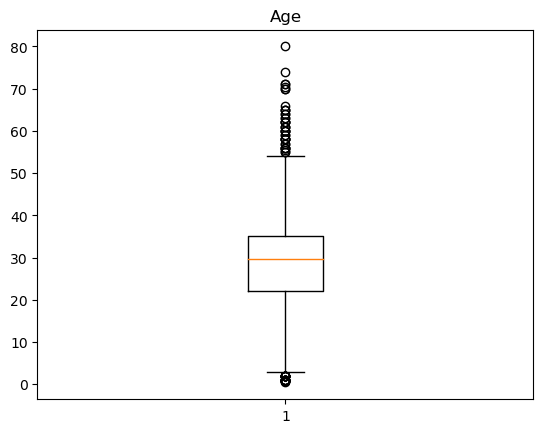

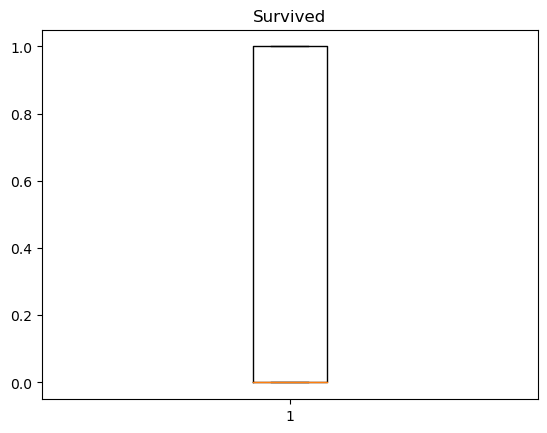

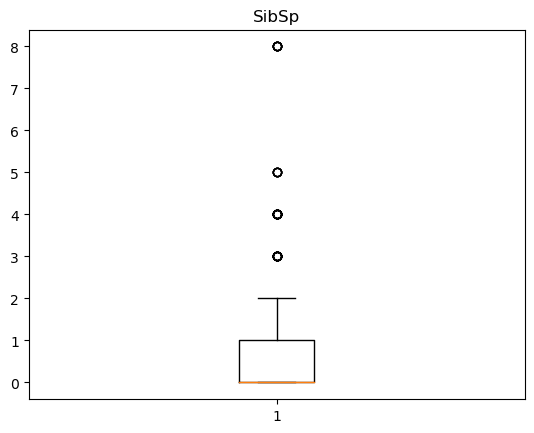

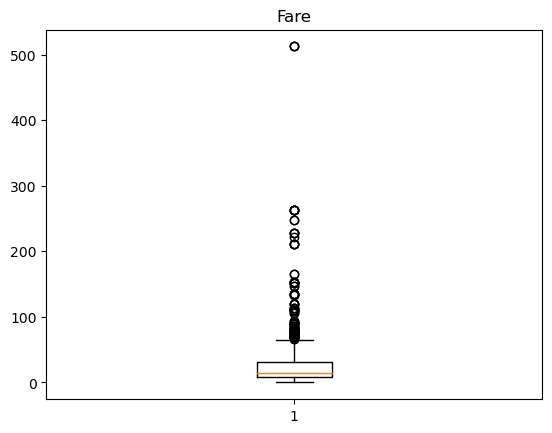

In [46]:
#Checking outliers in the columns'Age', 'SibSP' & 'Fare'

num_columns = ['Age','Survived','SibSp','Fare']
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

In [47]:
#Finding outliers from Age
Q1 = np.percentile(data["Age"],25,method="midpoint")
Q2 = np.percentile(data["Age"],50,method="midpoint")
Q3 = np.percentile(data["Age"],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 22.0
q2 is 29.69911764705882
q3 is 35.0
min is 2.5
max is 54.5
Ouliers are [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [48]:
ind_age = data["Age"]<low_lim
inds_age = data.loc[ind_age].index
inds_age

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [49]:
data.drop(inds_age,inplace = True)

In [50]:
Q1 = np.percentile(data["SibSp"],25,method="midpoint")
Q2 = np.percentile(data["SibSp"],50,method="midpoint")
Q3 = np.percentile(data["SibSp"],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['SibSp']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 0.0
q2 is 0.0
q3 is 1.0
min is -1.5
max is 2.5
Ouliers are [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [51]:
ind_sibsp = data["SibSp"]>up_lim
inds_sibsp = data.loc[ind_sibsp].index
inds_sibsp

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [52]:
data.drop(inds_sibsp,inplace = True)

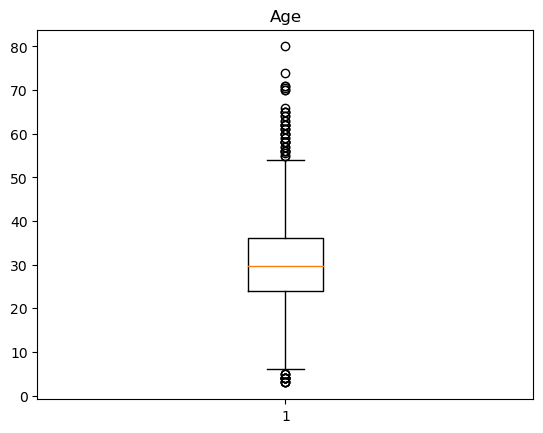

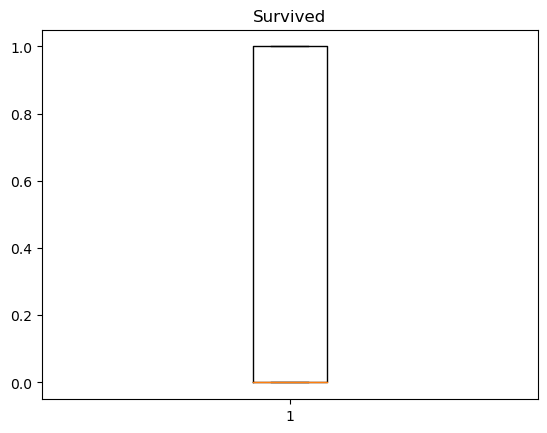

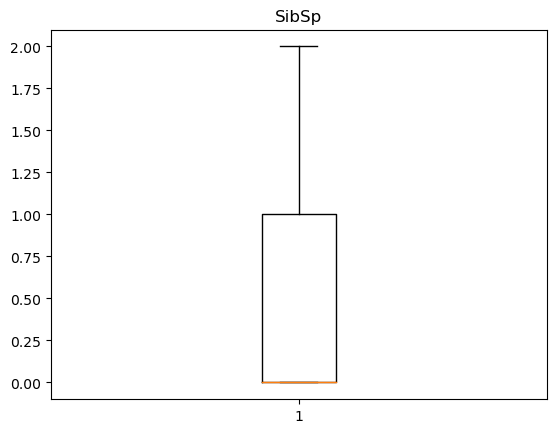

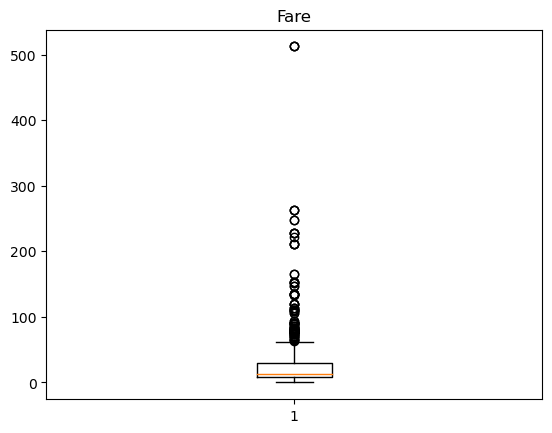

In [53]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  828 non-null    int64  
 1   Sex       828 non-null    object 
 2   Age       828 non-null    float64
 3   SibSp     828 non-null    int64  
 4   Parch     828 non-null    int64  
 5   Fare      828 non-null    float64
 6   Embarked  828 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 51.8+ KB


In [30]:
data.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [55]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
data['Sex'] = le.fit_transform(data['Sex'])

In [62]:
data['Embarked'] = le.fit_transform(data['Embarked'])

In [63]:
data.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,1,22.000000,1,0,7.2500,2
2,1,0,38.000000,1,0,71.2833,0
3,1,0,26.000000,0,0,7.9250,2
4,1,0,35.000000,1,0,53.1000,2
5,0,1,35.000000,0,0,8.0500,2
6,0,1,29.699118,0,0,8.4583,1
7,0,1,54.000000,0,0,51.8625,2
9,1,0,27.000000,0,2,11.1333,2
10,1,0,14.000000,1,0,30.0708,0


### Training and Testing

In [64]:
y = data['Survived']
x = data.drop(['Survived'], axis = 1)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

### SVM

In [71]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [73]:
 accuracy_score(y_test,y_pred_svm)

0.8353413654618473

### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

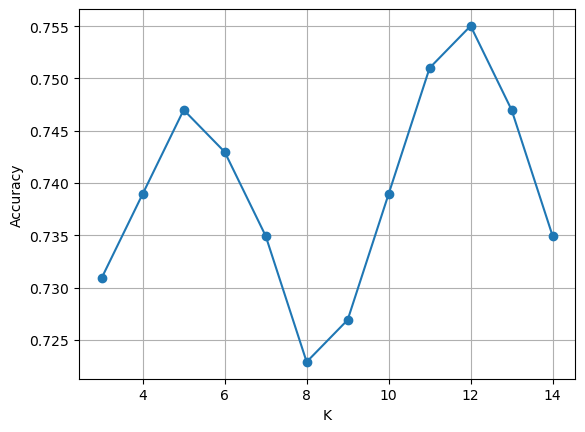

In [75]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [76]:
classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7550200803212851


### K-fold Cross Validation

In [77]:
from sklearn.model_selection import KFold

In [78]:
k = KFold(20)
k

KFold(n_splits=20, random_state=None, shuffle=False)

In [79]:
for train_index,test_index in k.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
cv_result_knn = cross_val_score( classifier,x,y,cv=k)

In [82]:
cv_result_knn

array([0.61904762, 0.69047619, 0.61904762, 0.66666667, 0.76190476,
       0.71428571, 0.76190476, 0.76190476, 0.7804878 , 0.58536585,
       0.80487805, 0.68292683, 0.63414634, 0.82926829, 0.65853659,
       0.75609756, 0.80487805, 0.7804878 , 0.75609756, 0.70731707])

In [83]:
np.mean(cv_result_knn)

0.7187862950058073

In [84]:
cv_result_svm = cross_val_score(svm_cls,x,y,cv=k)

In [85]:
cv_result_svm

array([0.78571429, 0.88095238, 0.78571429, 0.83333333, 0.80952381,
       0.76190476, 0.83333333, 0.9047619 , 0.80487805, 0.70731707,
       0.85365854, 0.7804878 , 0.73170732, 0.7804878 , 0.75609756,
       0.70731707, 0.82926829, 0.90243902, 0.80487805, 0.80487805])

In [86]:
np.mean(cv_result_svm)

0.8029326364692219

### Stratified K-Fold Cross Validation

In [87]:
from sklearn.model_selection import StratifiedKFold

sk = StratifiedKFold(n_splits = 20)

In [88]:
for train_index,test_index in sk.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 28  32  35  39  40  43  47  48  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284

In [89]:
skvc_result_knn = cross_val_score(classifier,x,y,cv = sk)

In [90]:
skvc_result_knn

array([0.61904762, 0.71428571, 0.54761905, 0.5952381 , 0.73809524,
       0.71428571, 0.85714286, 0.73809524, 0.80487805, 0.65853659,
       0.68292683, 0.68292683, 0.73170732, 0.7804878 , 0.68292683,
       0.75609756, 0.73170732, 0.75609756, 0.75609756, 0.70731707])

In [100]:
Knn_average_accuracy = np.mean(skvc_result_knn)

In [102]:
Knn_average_accuracy

0.7127758420441347

In [92]:
skvc_result_svm = cross_val_score(svm_cls,x,y,cv = sk)

In [93]:
skvc_result_svm

array([0.78571429, 0.88095238, 0.78571429, 0.80952381, 0.80952381,
       0.73809524, 0.88095238, 0.9047619 , 0.80487805, 0.82926829,
       0.70731707, 0.82926829, 0.73170732, 0.80487805, 0.75609756,
       0.75609756, 0.7804878 , 0.85365854, 0.80487805, 0.80487805])

In [103]:
Svm_average_accuracy = np.mean(skvc_result_svm)

In [104]:
Svm_average_accuracy

0.8029326364692219